<a href="https://colab.research.google.com/github/edofreeg/pokemon/blob/main/analisipokemondataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis on Pokemon Dataset

# Import packages and dataset




In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [ ]:
url = 'https://raw.githubusercontent.com/edofreeg/pokemon/main/Pokemondf.csv'
pokemon_df = pd.read_csv(url,sep=';',index_col='index')

# First look at the dataset

In [ ]:
pokemon_df["legendary"] = np.where(pokemon_df["legendary"] == 1, True, False)
pokemon_df['generation'] = pokemon_df['generation'].astype(str)

# columns name 
print(pokemon_df.columns)

# generation: when the pokemon was introduced
# legendary: if it is legendary
# evolution_status: which stage of the evolution line is, single if it hasn't
# type_2: is Nan if the pokemon hasn't a second type

Index(['name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense',
       'sp.atk', 'sp.def', 'speed', 'generation', 'legendary',
       'evolution_status'],
      dtype='object')


In [ ]:
pokemon_df.dtypes

name                object
type_1              object
type_2              object
total                int64
hp                   int64
attack               int64
defense              int64
sp.atk               int64
sp.def               int64
speed                int64
generation          object
legendary             bool
evolution_status    object
dtype: object

In [ ]:
pokemon_df.head(9)

,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary,evolution_status
index,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,First
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Middle
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Final
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,First
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Middle
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Final
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,First
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,Middle
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Final


In [ ]:
pokemon_df.describe()

,total,hp,attack,defense,sp.atk,sp.def,speed
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,405.090674,66.240933,71.634715,68.696891,66.512953,67.683938,64.321244
std,108.356121,28.186696,28.433266,30.599530,27.587143,27.774296,27.056274
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,314.000000,50.000000,50.000000,48.250000,45.000000,50.000000,45.000000
50%,410.000000,63.000000,70.000000,65.000000,65.000000,65.000000,62.000000
75%,490.000000,80.000000,90.000000,85.000000,85.000000,80.000000,85.000000
max,680.000000,255.000000,160.000000,230.000000,154.000000,230.000000,160.000000


# pokemon's type statistic 

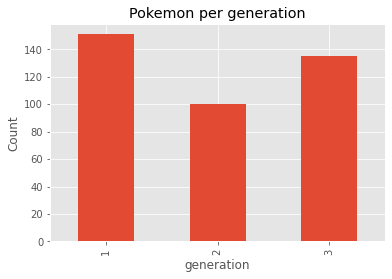

In [ ]:
ax = pokemon_df['generation'].value_counts(sort=False) \
    .plot(kind='bar', title='Pokemon per generation')
ax.set_xlabel('generation')
ax.set_ylabel('Count')
plt.show()

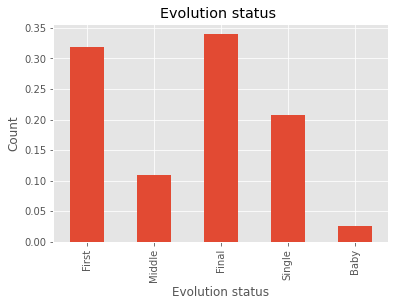

In [ ]:
ax = pokemon_df['evolution_status'].value_counts(sort=False,normalize=True) \
    .plot(kind='bar', title='Evolution status ')
ax.set_xlabel('Evolution status')
ax.set_ylabel('Count')
plt.show()

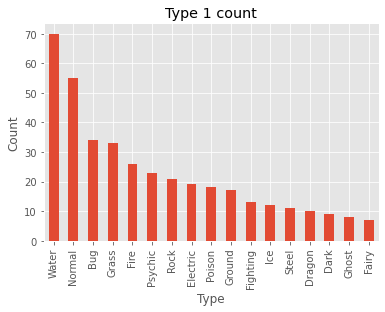

In [ ]:
ax = pokemon_df['type_1'].value_counts() \
    .plot(kind='bar', title='type 1 count')
ax.set_xlabel('type')
ax.set_ylabel('Count')

plt.show()

In [ ]:
pokemon_df['type_1'].value_counts()

Water       70
Normal      55
Bug         34
Grass       33
Fire        26
Psychic     23
Rock        21
Electric    19
Poison      18
Ground      17
Fighting    13
Ice         12
Steel       11
Dragon      10
Dark         9
Ghost        8
Fairy        7
Name: type_1, dtype: int64

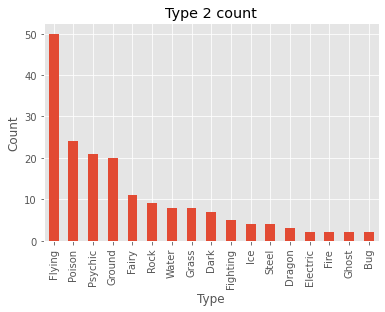

In [ ]:
ax = pokemon_df['type_2'].value_counts() \
    .plot(kind='bar', title='type 2 count')
ax.set_xlabel('type')
ax.set_ylabel('Count')
plt.show()

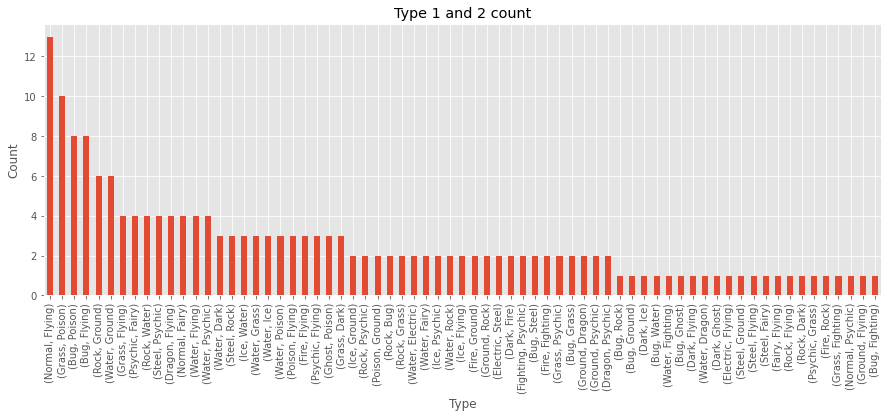

In [ ]:
ax = pokemon_df[['type_1','type_2']].value_counts() \
    .plot(kind='bar', title='type 1 and 2 count', figsize=(15, 5))
ax.set_xlabel('type')
ax.set_ylabel('Count')

plt.show()

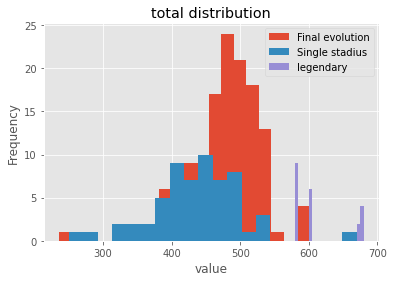

In [ ]:
ax = pokemon_df.total[pokemon_df.evolution_status=='Final'].plot(kind='hist',
                          bins=20,label='Final evolution')
ax = pokemon_df.total[(pokemon_df.evolution_status=='Single') & (pokemon_df.legendary==0)].plot(kind='hist',
                          bins=20,
                          title='total distribution',label='Single stadius')
ax = pokemon_df.total[pokemon_df.legendary==1].plot(kind='hist',
                          bins=20,
                          title='total distribution',label='legendary')
ax.legend()
ax.set_xlabel('value')
plt.show()

# pokemon combat statistics 

Text(0.5, 0, 'Speed')

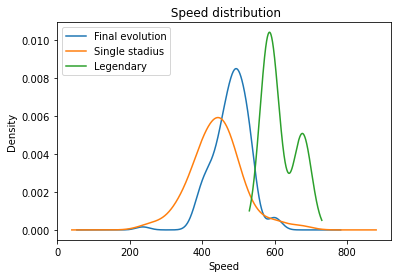

In [ ]:
ax = pokemon_df.total[pokemon_df.evolution_status=='Final'].plot(kind='kde',
                          title=' speed distribution',label='Final evolution')
ax = pokemon_df.total[(pokemon_df.evolution_status=='Single') & (pokemon_df.legendary==0)].plot(kind='kde',
                          title=' speed distribution',label='Single stadius')
ax = pokemon_df.total[pokemon_df.legendary==1].plot(kind='kde',
                          title=' speed distribution',label='legendary')


ax.legend(loc='upper left')
ax.set_xlabel('speed')
plt.show()

The average "Attack" for the non-legendary single/last form pokemon is 76, while for legendary is 101


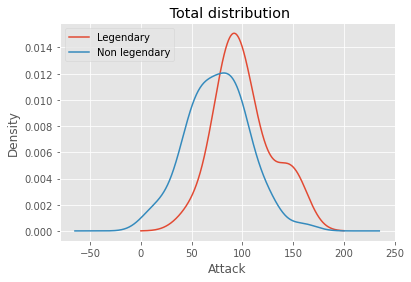

In [ ]:
ax = pokemon_df.attack[pokemon_df.legendary==1].plot(kind='kde',
                          title=' total distribution',label='legendary')
ax = pokemon_df.attack[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].plot(kind='kde',
                          title=' total distribution',label='Non legendary')

atk_non_leg =pokemon_df.attack[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].mean()
atk_leg=pokemon_df.attack[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==1)].mean()
ax.legend(loc='upper left')
ax.set_xlabel('attack')
print(f'The average "attack" for the non-legendary single/last form pokemon is {atk_non_leg:.0f}, while for legendary is {atk_leg:.0f}')
plt.show()

The average "Defense" for the non-legendary single/last form pokemon is 74, while for legendary is 103


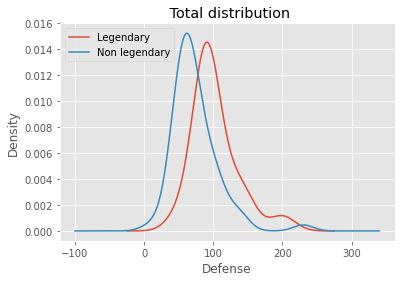

In [ ]:
ax = pokemon_df.defense[pokemon_df.legendary==1].plot(kind='kde',
                          title=' total distribution',label='legendary')
ax = pokemon_df.defense[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].plot(kind='kde',
                          title=' total distribution',label='Non legendary')

atk_non_leg =pokemon_df.defense[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].mean()
atk_leg=pokemon_df.defense[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==1)].mean()
ax.legend(loc='upper left')
ax.set_xlabel('defense')
print(f'The average "defense" for the non-legendary single/last form pokemon is {atk_non_leg:.0f}, while for legendary is {atk_leg:.0f}')
plt.show()

In [ ]:
selected_values=['Fianl','Single']
pokemon_df.speed[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].mean()

75.56666666666666

The average "Speed" for the non-legendary single/last form pokemon is 72, while for legendary is 95


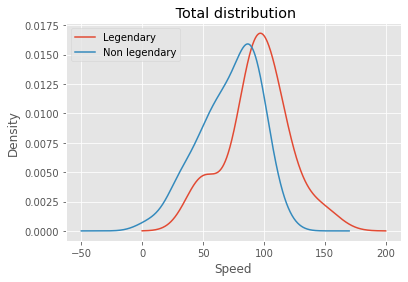

In [ ]:
ax = pokemon_df.speed[pokemon_df.legendary==1].plot(kind='kde',
                          title=' total distribution',label='legendary')
ax = pokemon_df.speed[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].plot(kind='kde',
                          title=' total distribution',label='Non legendary')

atk_non_leg =pokemon_df.speed[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==0)].mean()
atk_leg=pokemon_df.speed[(pokemon_df.evolution_status.isin(['Fianl','Single'])) & (pokemon_df.legendary==1)].mean()
ax.legend(loc='upper left')
ax.set_xlabel('speed')
print(f'The average "speed" for the non-legendary single/last form pokemon is {atk_non_leg:.0f}, while for legendary is {atk_leg:.0f}')
plt.show()

In [ ]:
def eff_score(row):
  if row.attack>=row['sp.atk']:
    return row.attack+row.defense+row.speed+row['sp.def']+row.hp
  else:
    return row['sp.atk']+row.defense+row.speed+row['sp.def']+row.hp

In [ ]:
# efficiency total
for index, row in pokemon_df.iterrows():
  pokemon_df['eff_score'] = pokemon_df.apply(eff_score,axis=1)



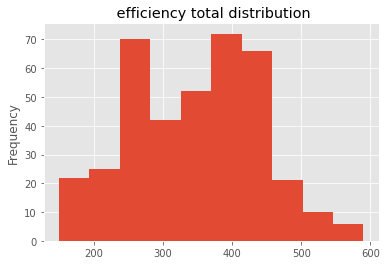

In [ ]:
pokemon_df['eff_score'].plot(kind='hist',
                          title=' efficiency total distribution')


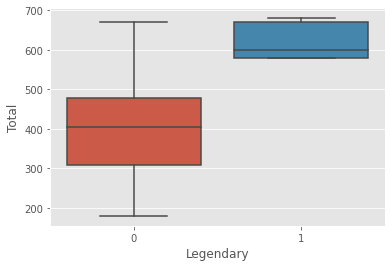

In [ ]:
sns.boxplot(x="legendary", y="total", data=pokemon_df)
plt.show()

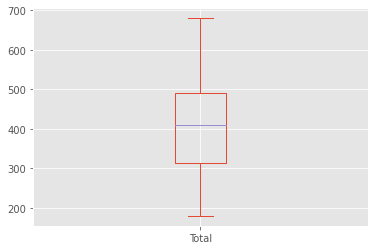

In [ ]:
pokemon_df[['total']].plot.box()

In [ ]:
pokemon_df[pokemon_df['evolution_status'].isin(['Final','Single'])]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,Evolution_Status
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,Final
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0,Final
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,0,Final
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,0,Final
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,0,Final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,1,Single
382,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,1,Single
383,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,1,Single
384,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,1,Single


In [ ]:
pokemon_df.evolution_status.unique()

array(['First', 'Middle', 'Final', 'Single', 'Baby'], dtype=object)

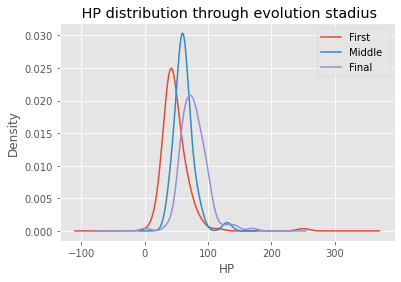

In [ ]:
ax = pokemon_df.hp[pokemon_df.evolution_status=='First'].plot(kind='kde',
                          title=' hp distribution ',label='First ')
ax = pokemon_df.hp[pokemon_df.evolution_status=='Middle'].plot(kind='kde',
                          title=' hp distribution',label='Middle ')
ax = pokemon_df.hp[pokemon_df.evolution_status=='Final'].plot(kind='kde',
                          title=' hp distribution through evolution stadius',label='Final ')


ax.legend(loc='upper right')
ax.set_xlabel('hp')
plt.show()

In [ ]:
pokemon_df[['Name','total']].loc[pokemon_df.evolution_status=='Final'].sort_values('total')

,Name,Total
291,Shedinja,236
300,Delcatty,380
268,Dustox,385
167,Ariados,390
165,Ledian,390
...,...,...
58,Arcanine,555
148,Dragonite,600
247,Tyranitar,600
372,Salamence,600


In [ ]:
pokemon_df.speed[pokemon_df.evolution_status.iloc['Final','Single']].hist(grid=False, bins=15)
round(np.mean(pokemon_df.speed[pokemon_df.evolution_status=='Final']),0)

In [ ]:
 
selected_values = ['Final' , 'Single']

pokemon_df[['Name','total','sp.atk']][(pokemon_df.evolution_status.isin(selected_values)) & (pokemon_df.legendary==1) & (pokemon_df['sp.atk'] > 100)].sort_values(by='total', ascending=False)
round(np.mean(pokemon_df.total[(pokemon_df.evolution_status.isin(selected_values)) & (pokemon_df.legendary==1)]),0)

615.0

In [ ]:
pokemon_df[['Name','total']]

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,Charmander,309
4,Charmeleon,405
...,...,...
381,Kyogre,670
382,Groudon,670
383,Rayquaza,680
384,Jirachi,600


In [ ]:
selected_values = ['Final' , 'Single']

## comparison between statistic

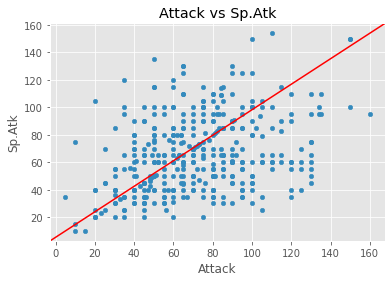

In [ ]:
# no apparently correlation between atk and sp.ak 
ax = pokemon_df.plot(kind='scatter',
        x='speed',
        y='sp.atk',
        title='speed vs sp.atk')
line = mlines.Line2D([0, 250], [0, 250], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

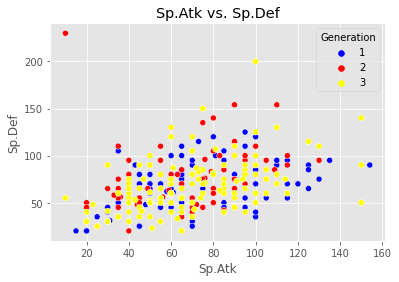

In [ ]:
# same scatter plot but with the add of the pokemon division in generation
# again the division seem random
ax = sns.scatterplot(x='sp.atk',
                y='sp.def',
                hue='generation', palette={1:'blue',2:'red',3:'yellow'},
                data=pokemon_df)
ax.set_title('sp.atk vs. sp.def')
plt.show()

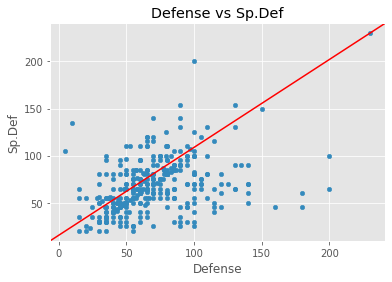

In [ ]:
# slight positive corrrelation between def and sp.def
ax= pokemon_df.plot(kind='scatter',
        x='speed',
        y='sp.def',
        title='speed vs sp.def')



line = mlines.Line2D([0, 250], [0, 250], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [ ]:
pokemon_df[(pokemon_df.evolution_status.isin(selected_values)) & (pokemon_df.legendary==0)]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,Evolution_Status
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,Final
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0,Final
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,0,Final
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,0,Final
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,0,Final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,368,Gorebyss,Water,NaN,485,55,84,105,114,75,52,3,0,Final
368,369,Relicanth,Water,Rock,485,100,90,130,45,65,55,3,0,Single
369,370,Luvdisc,Water,NaN,330,43,30,55,40,65,97,3,0,Single
372,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,0,Final


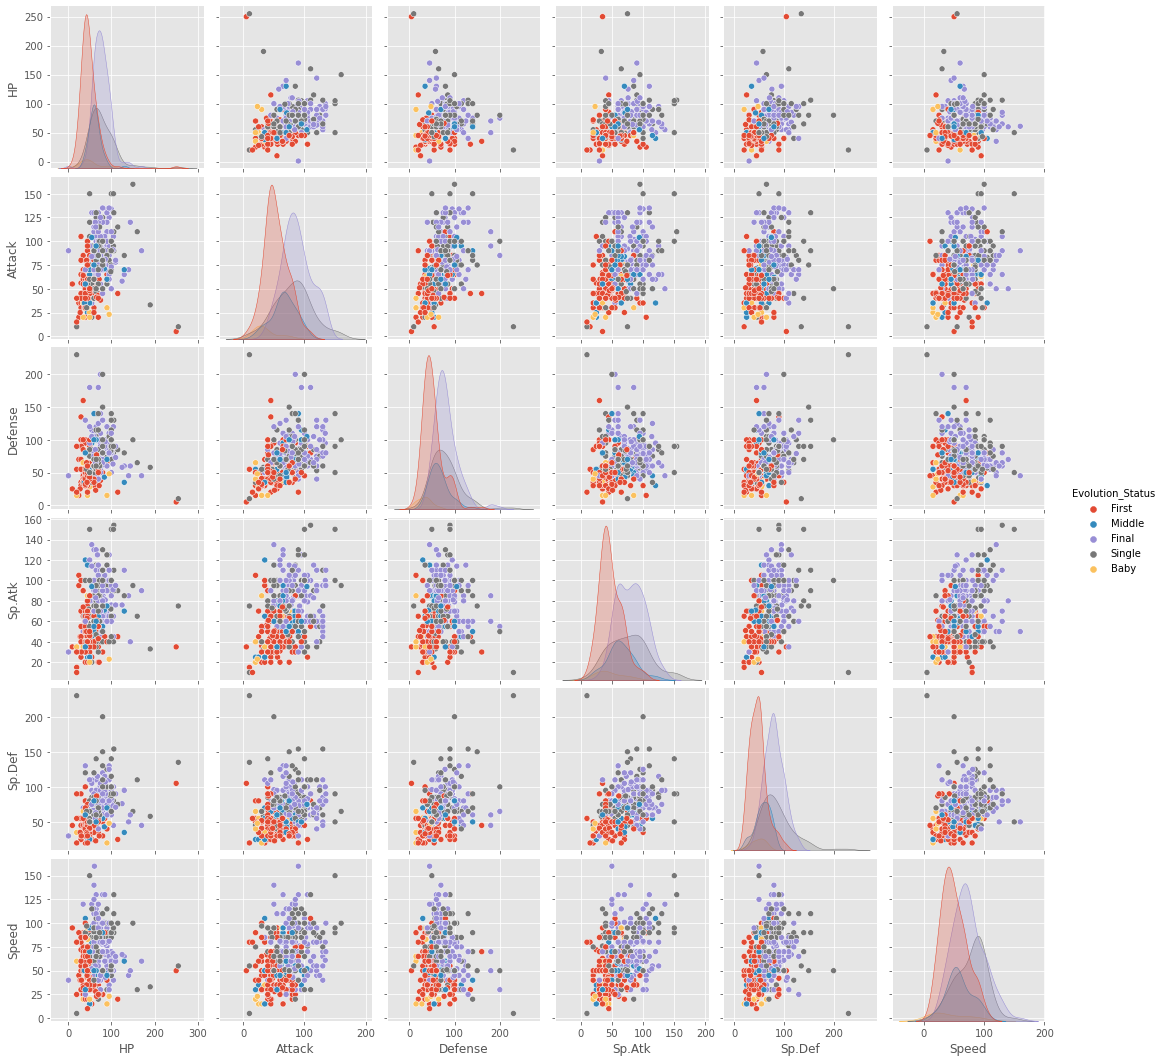

In [ ]:
# summary plot of all comparison combination 
sns.pairplot(pokemon_df,
             vars=[	'hp',	'speed',	'speed'	,'sp.atk',	'sp.def',	'speed'],
             hue='evolution_status') # colore per tipo in questo caso
plt.show()

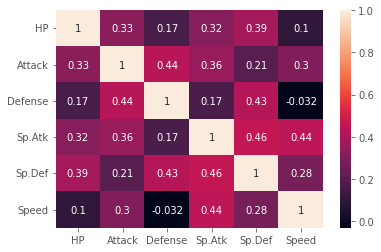

In [ ]:
# table of corralation, the variables aren't  so correlated each other.
df_corr = pokemon_df[['hp',	'speed',	'speed'	,'sp.atk',	'sp.def',	'speed']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()